In [1]:
import pandas as pd
import numpy as np
from invertiblewavelets import Transform, LinearFilterBank, DyadicFilterBank
import matplotlib.pyplot as plt
from invertiblewavelets import Cauchy, Morlet
from scipy import signal
%matplotlib inline

#### Load Example Data from Swarm A Spacecraft Magnetoemter

In [2]:
data = np.random.normal(0, 1, 5000)
sample_rate = 50.0                          # 50 Hz sampling rate
num_samples = data.shape[-1]                # 5000 samples
t = np.arange(num_samples) / sample_rate    # time array

#### Test Cases
1. N = 5000
2. Full or Same
3. Short or Long path

In [3]:
"Filterbank"
fb = DyadicFilterBank(wavelet=Morlet(1,2) , fs=sample_rate, N=5000, real=True, s_max = 2, dj = 1/18, compensation=True)

"Transform"
tf = Transform(fb.Wfreq)


#### Plot Wavelet Coefficients

In [4]:
# Perform forward wavelet transform
coefficients = tf.forward(data, mode='same')
tf.scalogram(coefficients)


TypeError: Transform.scalogram() missing 1 required positional argument: 'channel_freqs'

RMSEs:  3.684165849182574e-16


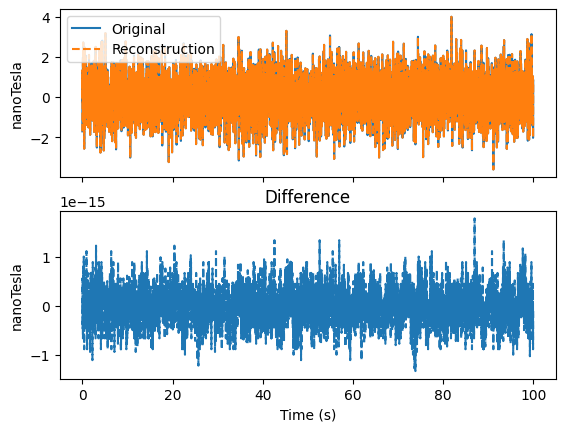

In [5]:
mode = 'full'

"Long path"
c = tf.forward(data, mode=mode)
r = tf.inverse(c, mode=mode, Lx = 5000)

print("RMSEs: ", np.sqrt(np.mean((data-r)**2)))
%matplotlib inline
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, data, label='Original')
ax[0].plot(t, r, label='Reconstruction', linestyle='--')    
ax[0].set_ylabel('nanoTesla')
ax[0].legend()
ax[1].plot(t, data-r, label='short', linestyle='--')
ax[1].set_title('Difference')
ax[1].set_ylabel('nanoTesla')
ax[1].set_xlabel('Time (s)')
plt.show()

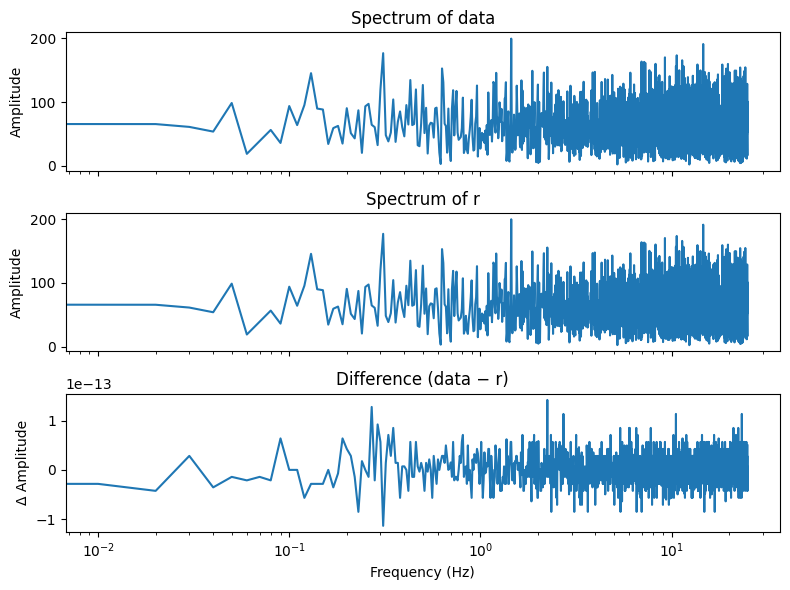

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fs = sample_rate
data = np.asarray(data)
r    = np.asarray(r)
N = len(data)
if len(r) != N:
    raise ValueError("data and r must have the same length")

# frequency axis
freqs = np.fft.fftfreq(N, d=1/fs)

# FFTs
DataFFT = np.fft.fft(data)
RFFT    = np.fft.fft(r)

# only keep the non‑negative frequencies
mask = freqs >= 0
f_pos = freqs[mask]
A_data = np.abs(DataFFT[mask])
A_r    = np.abs(RFFT[mask])
A_diff = A_data - A_r

# three‑panel subplot: data, r, and their difference
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 6))

axs[0].plot(f_pos, A_data)
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Spectrum of data')

axs[1].plot(f_pos, A_r)
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Spectrum of r')

axs[2].plot(f_pos, A_diff)
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Δ Amplitude')
axs[2].set_title('Difference (data − r)')
axs[2].set_xscale('log')
plt.tight_layout()
plt.show()
